In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
df = pd.read_csv('palm.csv')
df["time_stamp"] = pd.to_datetime(df["time_stamp"], unit='ms')

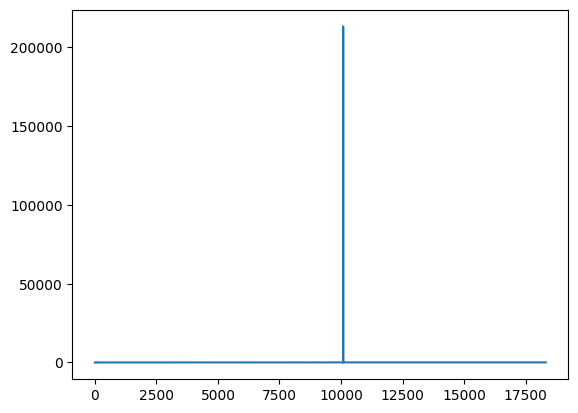

In [5]:
# plot timestamp interval over time
df["time_diff"] = df["time_stamp"].diff().dt.total_seconds()
df["time_diff"].plot()
plt.show()


In [6]:
# Ensure the time series is uniformly sampled
sample_period = 120 # 2 minutes
df = df.set_index("time_stamp")
df = df.resample(f"{sample_period}s").mean()
df = df.interpolate(method='time')
df = df.reset_index()

In [5]:
# scale each column to have identical power spectrum (mean 0, std 1)
df = df.set_index("time_stamp")
df = (df - df.mean())/df.std()
df = df.reset_index()

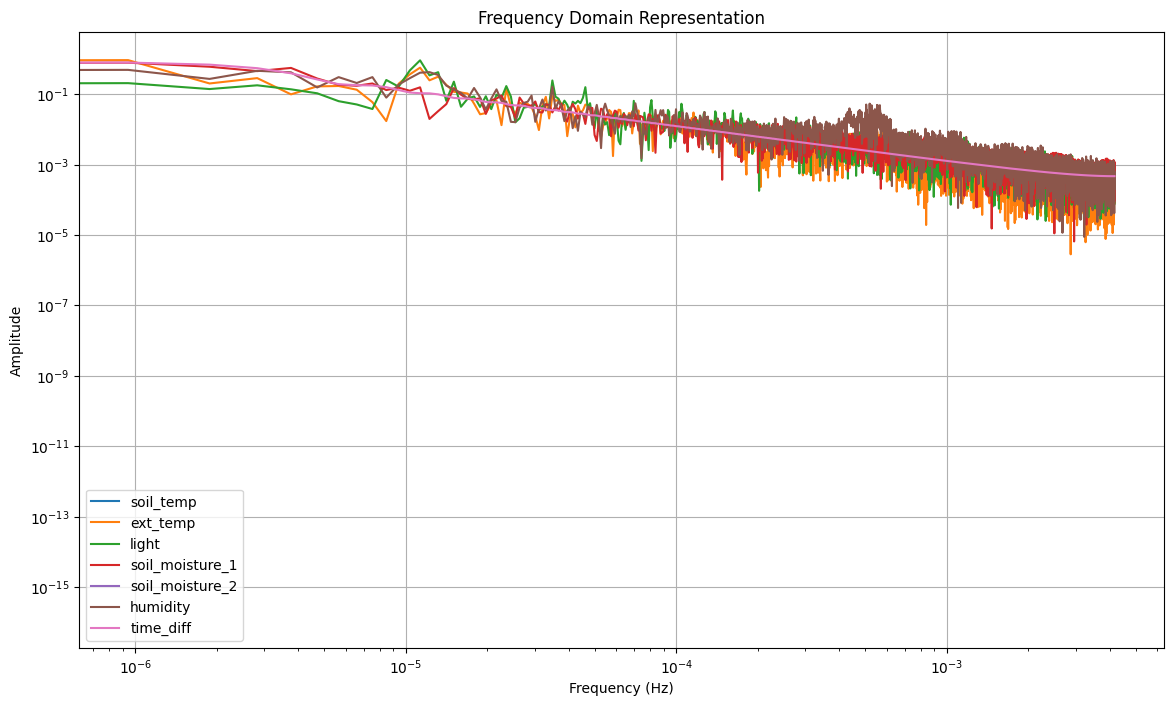

In [6]:
# Prepare the plot
plt.figure(figsize=(14, 8))

# Iterate through each sensor column
for column in df.columns[1:]:
    # Compute the Fourier Transform
    N = len(df[column])
    yf = fft(df[column].to_numpy())
    xf = fftfreq(N, sample_period)[:N//2]

    # Plot the Frequency Domain
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label=column)

# Plot settings
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#mean = df[['humidity', 'B']].mean()
cols = ["soil_temp", "soil_moisture_1"]
for c in cols:
    df[c] = df[c] - df["humidity"]

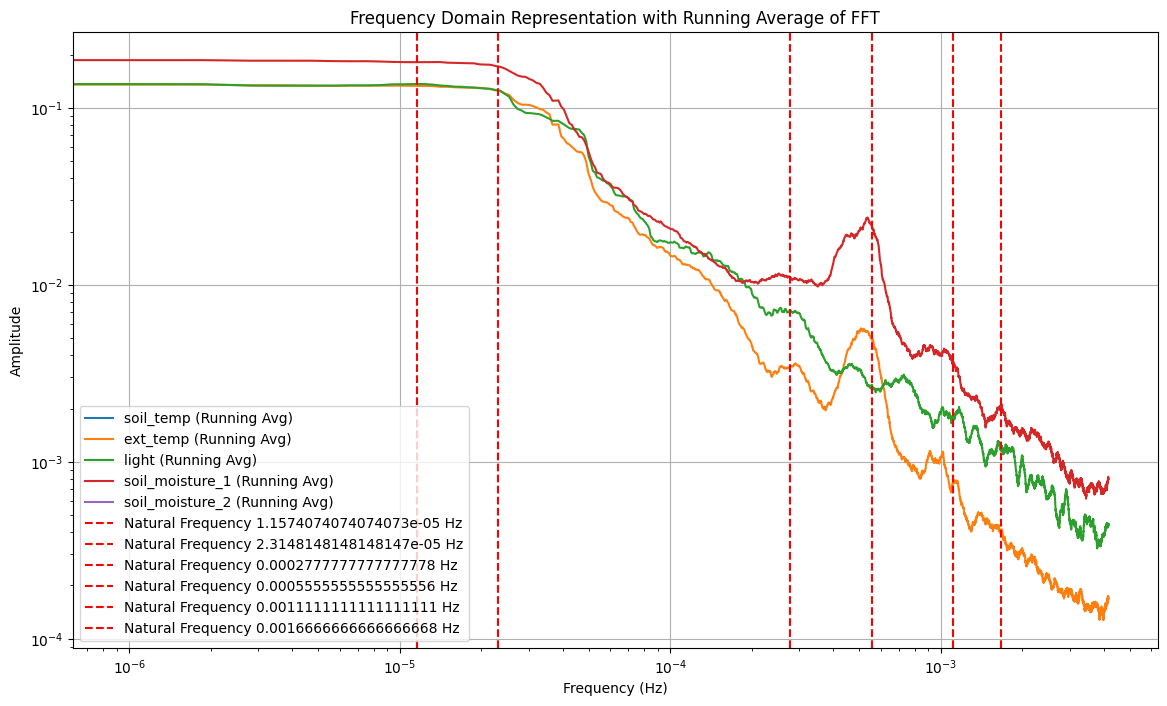

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.ndimage import uniform_filter1d

# Prepare the plot
plt.figure(figsize=(14, 8))

# Iterate through each sensor column
for column in df.columns[1:]:
    if column in ["humidity", "time_diff"]:
        continue
    # Compute the Fourier Transform
    N = len(df[column])
    yf = fft(df[column].to_numpy())
    xf = fftfreq(N, sample_period)[:N//2]

    # Calculate the running average of FFT amplitude
    window_size = 80  # Adjust the window size as needed
    smoothed_yf = uniform_filter1d(np.abs(yf[:N//2]), size=window_size)

    # Plot the Frequency Domain with running average
    plt.plot(xf, 2.0/N * smoothed_yf, label=f'{column} (Running Avg)')

# Frequencies in nature (24 hours, 12 hours, etc.)
# Convert these periods to frequencies (1 / period)
frequencies_nature = [1 / (24 * 3600), 1 / (12 * 3600), 1/3600, 1/1800, 1/900, 1/600]  # 24 hours and 12 hours in seconds

# Add vertical lines for each natural frequency
for freq in frequencies_nature:
    plt.axvline(x=freq, color='r', linestyle='--', label=f'Natural Frequency {freq} Hz')

# Plot settings
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation with Running Average of FFT')
plt.legend()
plt.grid(True)
plt.show()

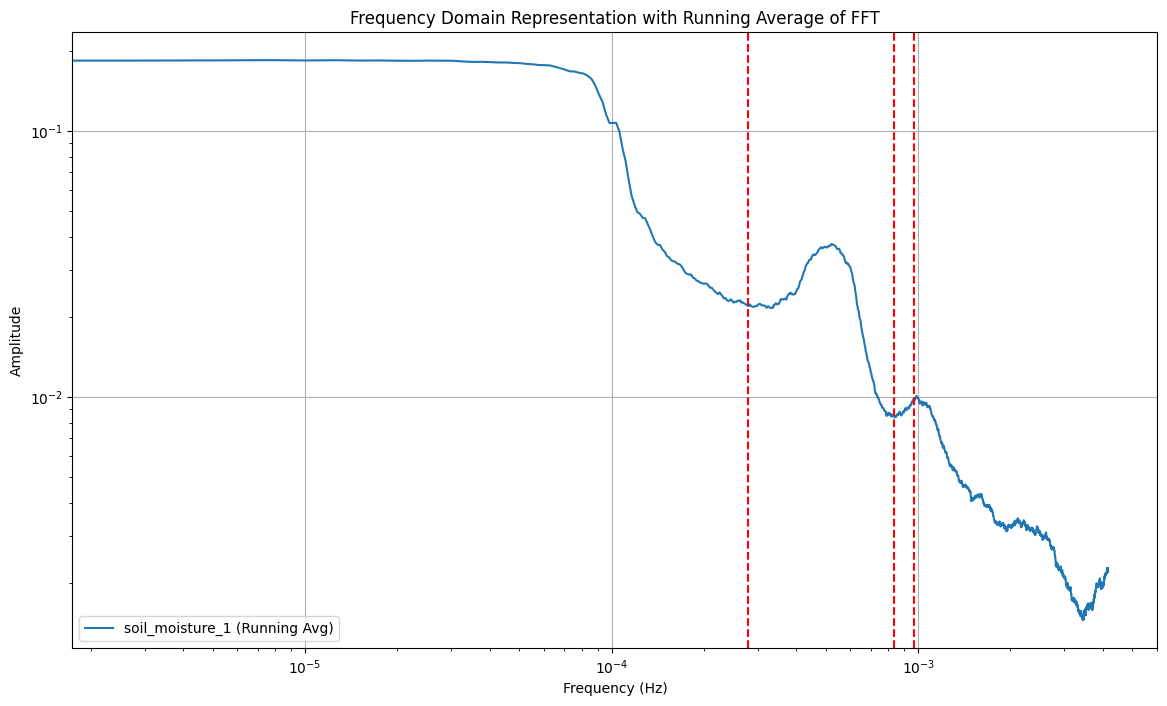

In [40]:
# detect all local minima of the soil moisture and plot the vertical lines
from scipy.signal import find_peaks

column = "soil_moisture_1"
N = len(df[column])
yf = fft(df[column].to_numpy())
xf = fftfreq(N, sample_period)[:N//2]

# Calculate the running average of FFT amplitude
window_size = 80  # Adjust the window size as needed
smoothed_yf = uniform_filter1d(np.abs(yf[:N//2]), size=window_size)


plt.figure(figsize=(14, 8))
plt.plot(xf, 2.0/N * smoothed_yf, label=f'{column} (Running Avg)')

plt.axvline(x=1/3600, color='r', linestyle='--')
plt.axvline(x=3/(3600), color='r', linestyle='--')
plt.axvline(x=3.5/(3600), color='r', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation with Running Average of FFT')
plt.legend()
plt.grid(True)
plt.show()
    

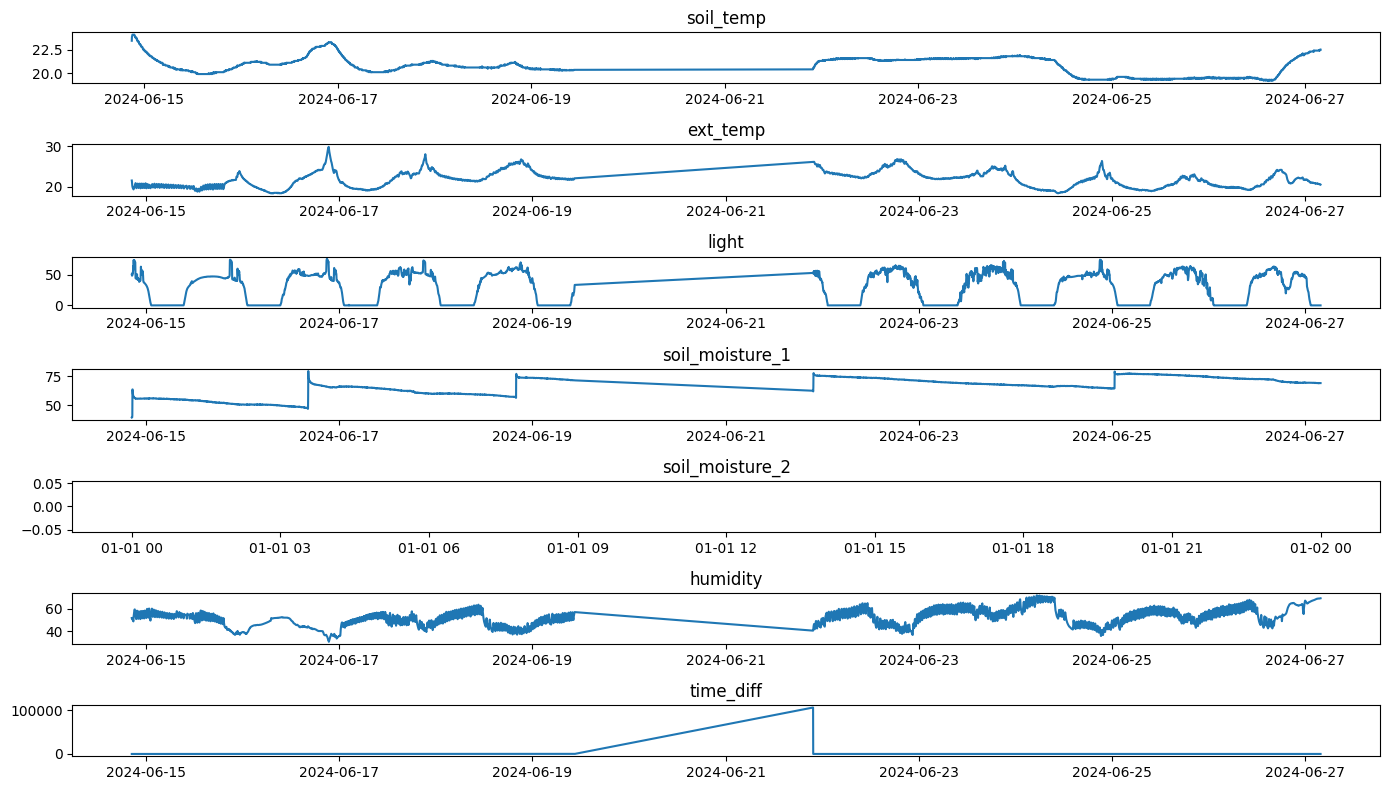

C:\Users\coolj\AppData\Local\Temp\ipykernel_11152\423338877.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample("30T").mean()


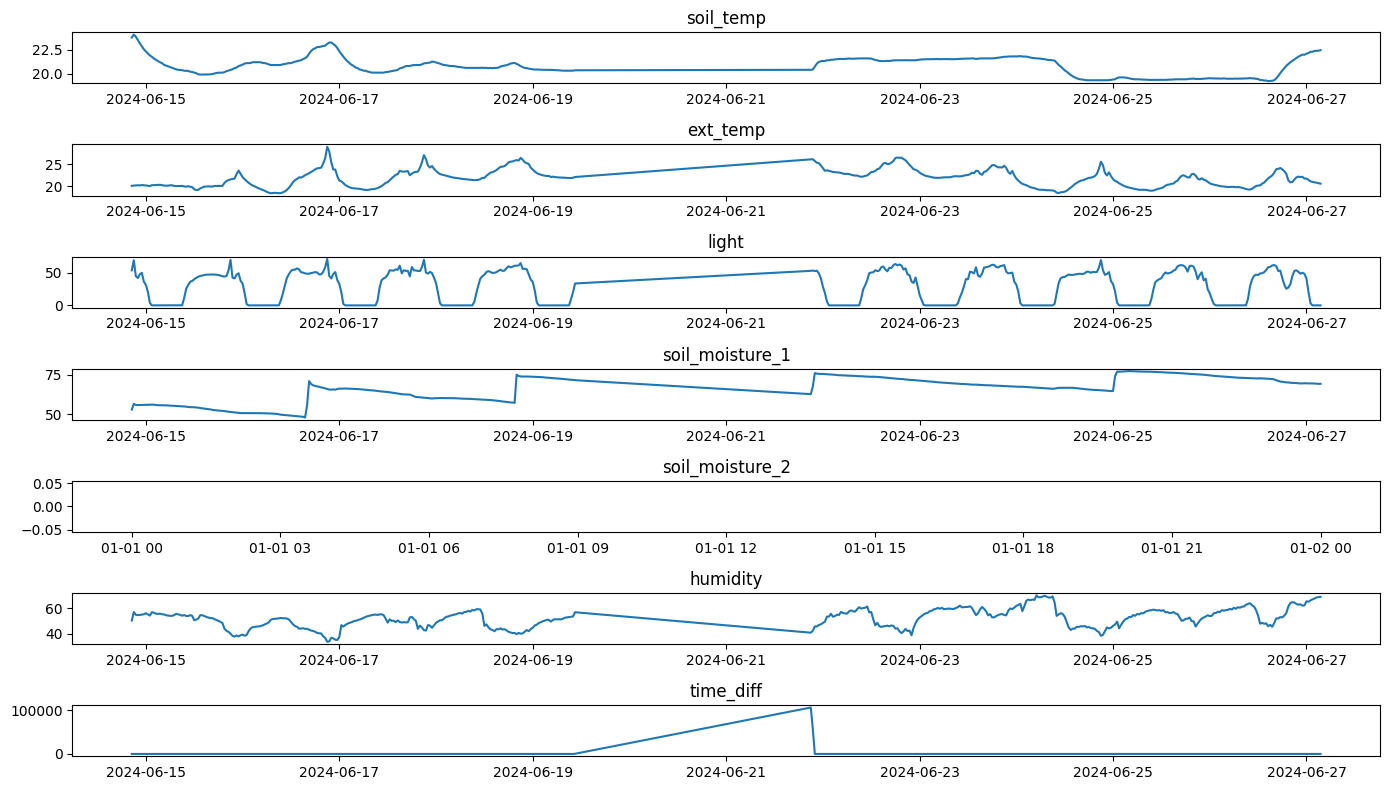

In [7]:
# resample to 30 minutes and plot all sensors in separate subplots
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns[1:]), 1, i+1)
    plt.plot(df["time_stamp"], df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

df = df.set_index("time_stamp")
df = df.resample("30T").mean()
df = df.interpolate(method='time')
df = df.reset_index()

plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns[1:]), 1, i+1)
    plt.plot(df["time_stamp"], df[column])
    plt.title(column)
plt.tight_layout()
plt.show()
